<a href="https://colab.research.google.com/github/kkewat/Neural-Networks/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.utils import to_categorical

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
from tensorflow.keras.datasets import cifar10

In [26]:
(X_train, y_train),(X_test,y_test) = cifar10.load_data()

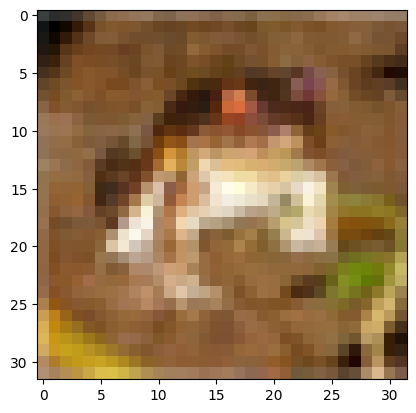

In [27]:
plt.imshow(X_train[0])

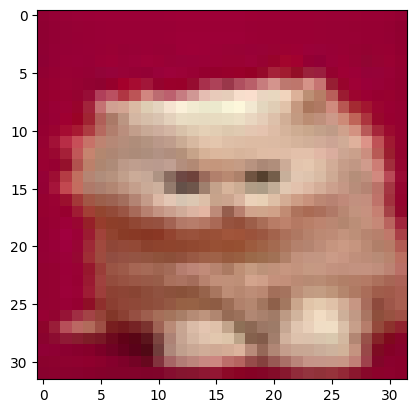

In [28]:
plt.imshow(X_train[10101])

In [29]:
print(X_train[1])

[[[154 177 187]
  [126 137 136]
  [105 104  95]
  ...
  [ 91  95  71]
  [ 87  90  71]
  [ 79  81  70]]

 [[140 160 169]
  [145 153 154]
  [125 125 118]
  ...
  [ 96  99  78]
  [ 77  80  62]
  [ 71  73  61]]

 [[140 155 164]
  [139 146 149]
  [115 115 112]
  ...
  [ 79  82  64]
  [ 68  70  55]
  [ 67  69  55]]

 ...

 [[175 167 166]
  [156 154 160]
  [154 160 170]
  ...
  [ 42  34  36]
  [ 61  53  57]
  [ 93  83  91]]

 [[165 154 128]
  [156 152 130]
  [159 161 142]
  ...
  [103  93  96]
  [123 114 120]
  [131 121 131]]

 [[163 148 120]
  [158 148 122]
  [163 156 133]
  ...
  [143 133 139]
  [143 134 142]
  [143 133 144]]]


In [30]:
X_train = X_train/255
X_test = X_test/255

In [31]:
y_train_en = to_categorical(y_train,10)
y_test_en = to_categorical(y_test,10)

In [32]:
model = Sequential()

In [33]:
# Add a Conv2D layer with 32 filters, each of size (4, 4), and 'relu' activation
# Specify the input shape as (32, 32, 3) for 32x32 RGB images
model.add(Conv2D(32, (4, 4), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Conv2D layer with 32 filters, each of size (4, 4), and 'relu' activation
model.add(Conv2D(32, (4, 4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers before feeding it into the dense layers
model.add(Flatten())

# Add a Dense layer with 128 units and 'relu' activation
model.add(Dense(128, activation='relu'))

# Add a Dense layer with 10 units (output layer for classification) and 'softmax' activation
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)              

In [36]:
history = model.fit(X_train, y_train_en, epochs=20, verbose=1, validation_data=(X_test,y_test_en))

Epoch 1/20
1563/1563 [==============================] - 61s 39ms/step - loss: 1.2996 - accuracy: 0.5404 - val_loss: 1.2214 - val_accuracy: 0.5643
Epoch 2/20
1563/1563 [==============================] - 59s 38ms/step - loss: 1.1177 - accuracy: 0.6048 - val_loss: 1.0928 - val_accuracy: 0.6141
Epoch 3/20
1563/1563 [==============================] - 60s 38ms/step - loss: 1.0107 - accuracy: 0.6429 - val_loss: 1.0943 - val_accuracy: 0.6204
Epoch 4/20
1563/1563 [==============================] - 59s 38ms/step - loss: 0.9319 - accuracy: 0.6710 - val_loss: 1.0004 - val_accuracy: 0.6503
Epoch 5/20
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8595 - accuracy: 0.6982 - val_loss: 0.9758 - val_accuracy: 0.6670
Epoch 6/20
1563/1563 [==============================] - 60s 38ms/step - loss: 0.8062 - accuracy: 0.7171 - val_loss: 0.9417 - val_accuracy: 0.6753
Epoch 7/20
1563/1563 [==============================] - 60s 38ms/step - loss: 0.7485 - accuracy: 0.7362 - val_loss: 0.9980 -